## EDA

前回 議事録より

・	とりあえず「球種予測」「コース予測」同時並行で進めていく
・	言語：python
・	コードの保持形式：適宜
・	連絡 + コードの共有：LINE + github

◉次回までにやること
データの基礎分析を進める期間は5月いっぱいで、6月第１週に情報共有

・	石川：球場の条件別
・	田村：試合の状況別
・	木村：時間単位の状況別


In [114]:
import pandas as pd
import japanize_matplotlib

In [115]:
train_player = pd.read_csv("../input/train_player.csv")
test_player = pd.read_csv("../input/test_player.csv")

## 煩わしいunicodeエラーを避けるためcolumn名を全て半角英語に変換

In [116]:
import json

with open("../input/names_player.json", "r", encoding="utf-8") as f:
     d = json.load(f)

train_player = train_player.rename(columns=d)
test_player = test_player.rename(columns=d)

## data size

In [117]:
train_player.shape, test_player.shape

((911, 25), (1846, 25))

In [118]:
train_player.head()

,year,team_ID,team,player_ID,player,development,number,position,throw,bat,...,college_ID,college,society,draft_year,draft_type,draft_rank,salary,country,birthplace,blood_type
0,2017,1,巨人,11343,相川 亮二,0,23,捕手,右,右,...,0,不明,NaN,1994.0,NaN,5.0,4500,日本,千葉,A
1,2017,1,巨人,11726,實松 一成,0,27,捕手,右,右,...,0,不明,NaN,1998.0,NaN,1.0,3700,日本,佐賀,A
2,2017,1,巨人,12049,阿部 慎之助,0,10,内野手,右,左,...,895,中央大,NaN,2000.0,NaN,1.0,26000,日本,千葉,A
3,2017,1,巨人,12107,杉内 俊哉,0,18,投手,左,左,...,0,不明,三菱重工長崎,2001.0,NaN,3.0,5000,日本,福岡,A
4,2017,1,巨人,12179,大竹 寛,0,17,投手,右,右,...,0,不明,NaN,2001.0,NaN,1.0,7000,日本,埼玉,B


In [119]:
train_player.columns

Index(['year', 'team_ID', 'team', 'player_ID', 'player', 'development',
       'number', 'position', 'throw', 'bat', 'height', 'weight', 'birth',
       'highschool_ID', 'highschool', 'college_ID', 'college', 'society',
       'draft_year', 'draft_type', 'draft_rank', 'salary', 'country',
       'birthplace', 'blood_type'],
      dtype='object')

## Check column types 

In [120]:
train_player.dtypes

year               int64
team_ID            int64
team              object
player_ID          int64
player            object
development        int64
number             int64
position          object
throw             object
bat               object
height             int64
weight             int64
birth             object
highschool_ID      int64
highschool        object
college_ID         int64
college           object
society           object
draft_year       float64
draft_type        object
draft_rank       float64
salary             int64
country           object
birthplace        object
blood_type        object
dtype: object

## Check null

player

In [121]:
display(train_player.isnull().sum())
test_player.isnull().sum()

year               0
team_ID            0
team               0
player_ID          0
player             0
development        0
number             0
position           0
throw              0
bat                0
height             0
weight             0
birth              0
highschool_ID      0
highschool         0
college_ID         0
college            0
society          698
draft_year        84
draft_type       711
draft_rank        84
salary             0
country            0
birthplace         0
blood_type         0
dtype: int64

year                0
team_ID             0
team                0
player_ID           0
player              0
development         0
number              0
position            0
throw               0
bat                 0
height              0
weight              0
birth               0
highschool_ID       0
highschool          0
college_ID          0
college             0
society          1439
draft_year        171
draft_type       1483
draft_rank        171
salary              0
country             0
birthplace          0
blood_type          0
dtype: int64

train, test共に"社会人", "ドラフト年", "ドラフト種別", "ドラフト順位"の列に欠損あり

## year

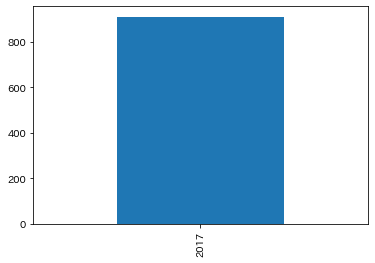

In [122]:
train_player["year"].value_counts().plot.bar()

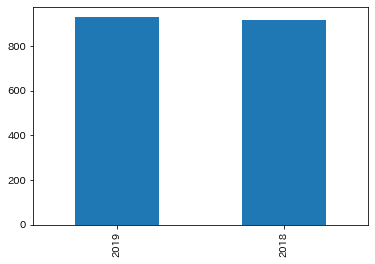

In [123]:
test_player["year"].value_counts().plot.bar()

この分布より、2017年度のデータから2018, 2019年度のデータを予測するタスクであると判明

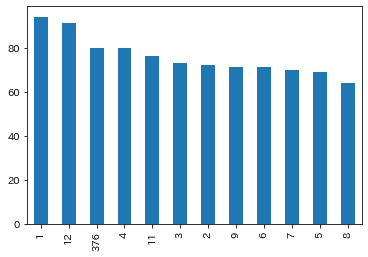

In [124]:
train_player["team_ID"].value_counts().plot.bar()

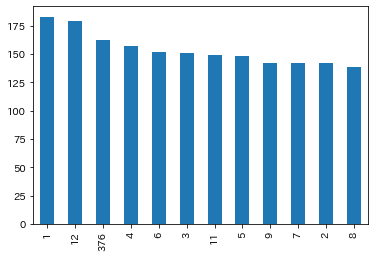

In [125]:
test_player["team_ID"].value_counts().plot.bar()

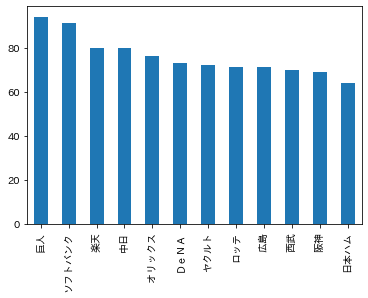

In [126]:
train_player["team"].value_counts().plot.bar()

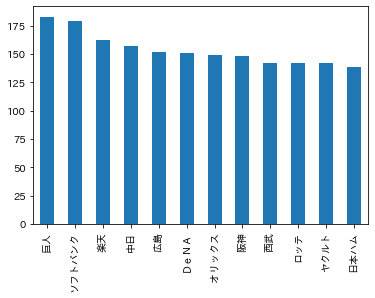

In [127]:
test_player["team"].value_counts().plot.bar()

分析時はteam_IDの列のみ用いれば良い

## player_ID

In [128]:
len(train_player["player_ID"].unique())

911

In [129]:
len(test_player["player_ID"].unique())

1060

## player

In [130]:
len(train_player["player"].unique())

907

In [131]:
len(test_player["player"].unique())

1054

上記の結果より,player_IDとplayerが1on1に対応していない
→シーズン中の移籍とかで名前おんなじだけど新しくID振られてしまった
などが理由として考えられるが、選手個人に依存しないモデルを作るためあんま気にしなくてok

## development

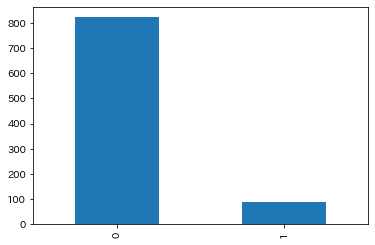

In [132]:
train_player["development"].value_counts().plot.bar()

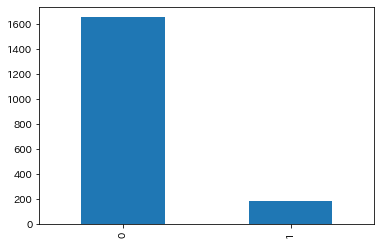

In [133]:
test_player["development"].value_counts().plot.bar()

支配下登録選手 : 育成選手 = 8 : 1 ぐらい

## number

In [134]:
len(train_player["number"].unique())

127

In [135]:
len(test_player["number"].unique())

139

## position

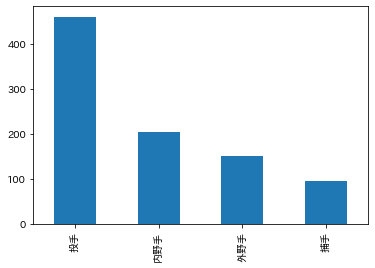

In [136]:
train_player["position"].value_counts().plot.bar()

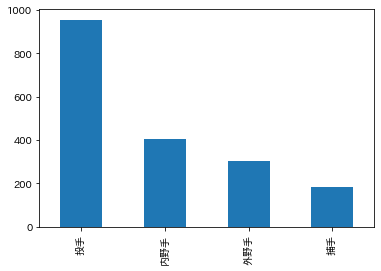

In [137]:
test_player["position"].value_counts().plot.bar()

trainとtestで分布はほぼ変わらない、投手のデータが圧倒的に多い

## throw

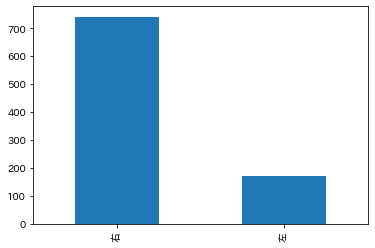

In [138]:
train_player["throw"].value_counts().plot.bar()

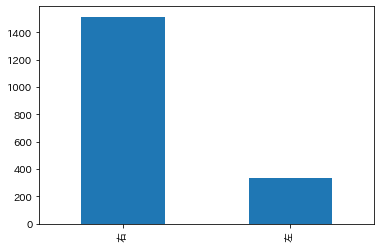

In [139]:
test_player["throw"].value_counts().plot.bar()

trainとtestでほぼ分布変わらない、右投げ多い（当たり前か）

## bat

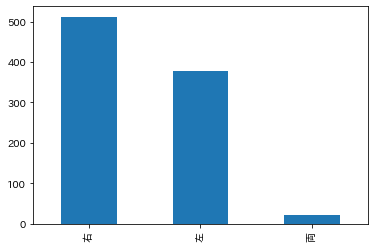

In [140]:
train_player["bat"].value_counts().plot.bar()

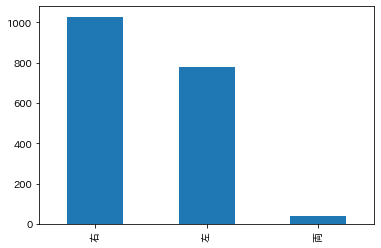

In [141]:
test_player["bat"].value_counts().plot.bar()

## height

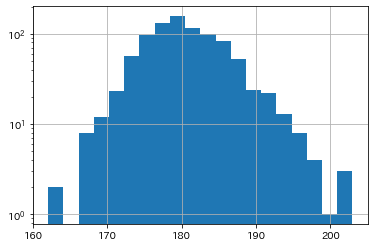

In [142]:
train_player["height"].hist(bins=20, log=True)

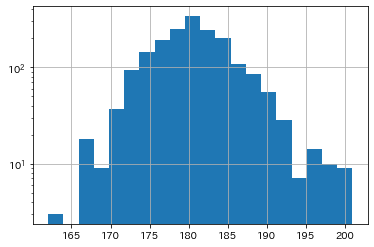

In [143]:
test_player["height"].hist(bins=20, log=True)

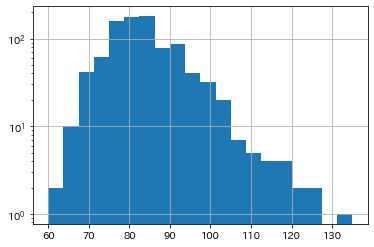

In [144]:
train_player["weight"].hist(bins=20, log=True)

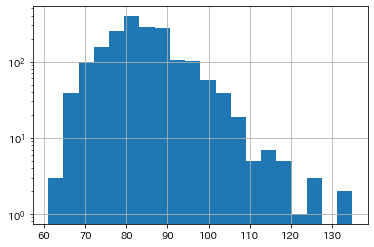

In [145]:
test_player["weight"].hist(bins=20, log=True)

## birth

In [146]:
train_player["old"] = train_player["birth"].map(lambda x: int(2020 - int(x[:4])))
test_player["old"] = test_player["birth"].map(lambda x: int(2020 - int(x[:4])))

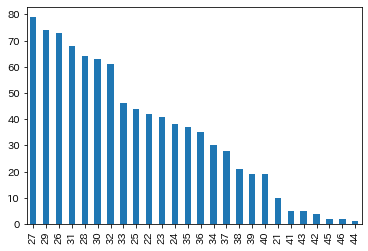

In [147]:
train_player["old"].value_counts().plot.bar()

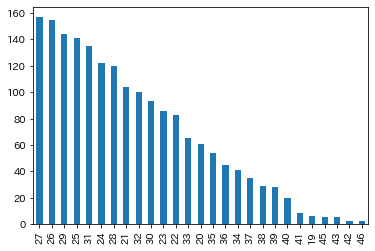

In [148]:
test_player["old"].value_counts().plot.bar()

## highschool_ID, highschool

In [150]:
len(train_player["highschool_ID"].unique())

439

In [162]:
len(train_player["highschool"].unique())

454

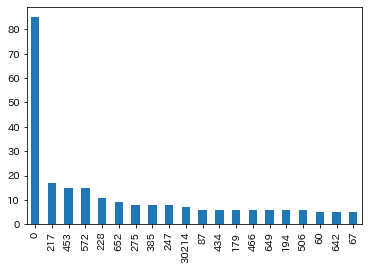

In [155]:
train_player["highschool_ID"].value_counts()[:20].plot.bar()

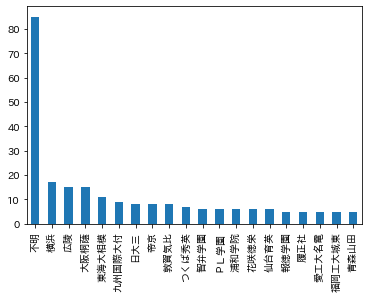

In [156]:
train_player["highschool"].value_counts()[:20].plot.bar()

In [158]:
len(test_player["highschool_ID"].unique())

478

In [163]:
len(test_player["highschool"].unique())

488

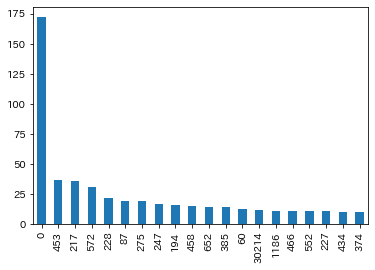

In [160]:
test_player["highschool_ID"].value_counts()[:20].plot.bar()

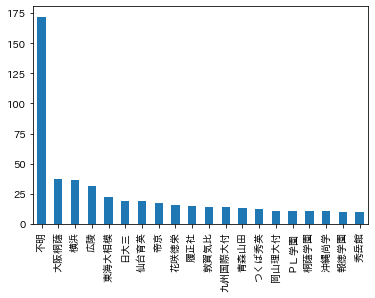

In [161]:
test_player["highschool"].value_counts()[:20].plot.bar()

この列もIDと高校名が1on1に対応していない

## college_ID, college

In [166]:
len(train_player["college_ID"].unique())

111

In [167]:
len(train_player["college"].unique())

111

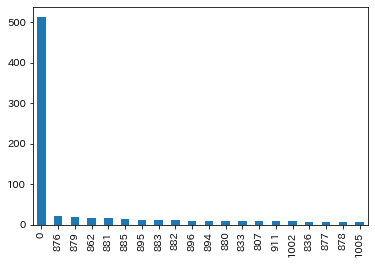

In [168]:
train_player["college_ID"].value_counts()[:20].plot.bar()

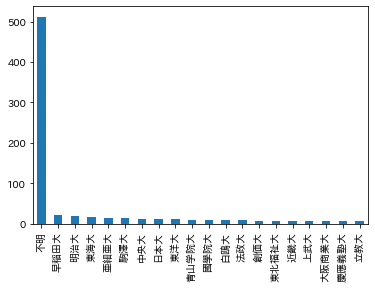

In [170]:
train_player["college"].value_counts()[:20].plot.bar()

In [171]:
len(test_player["college_ID"].unique())

114

In [172]:
len(test_player["college"].unique())

117

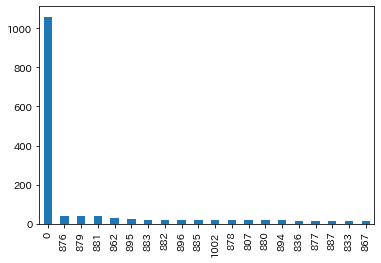

In [173]:
test_player["college_ID"].value_counts()[:20].plot.bar()

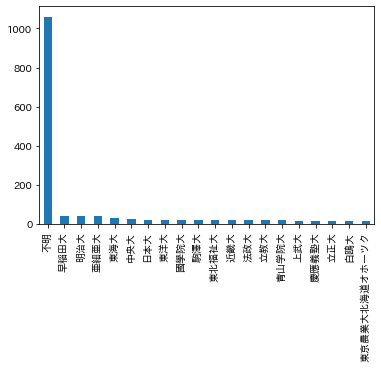

In [174]:
test_player["college"].value_counts()[:20].plot.bar()

## society

In [175]:
len(train_player["society"].unique())

93

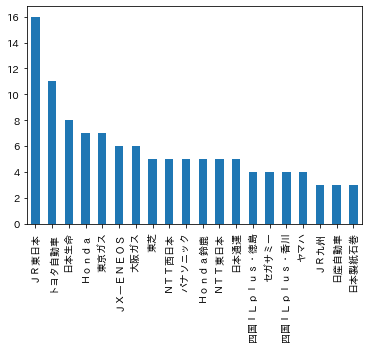

In [176]:
train_player["society"].value_counts()[:20].plot.bar()

In [177]:
len(test_player["society"].unique())

92

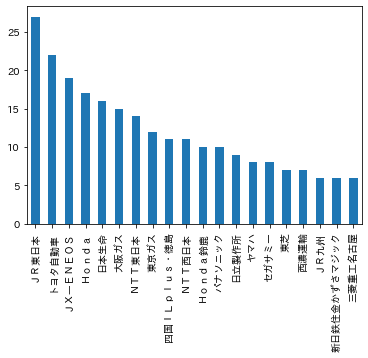

In [178]:
test_player["society"].value_counts()[:20].plot.bar()

## draft_year

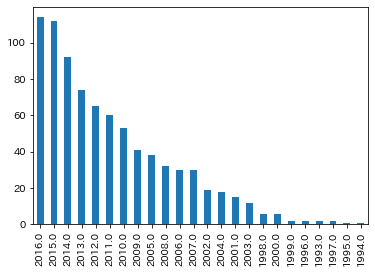

In [180]:
train_player["draft_year"].value_counts().plot.bar()

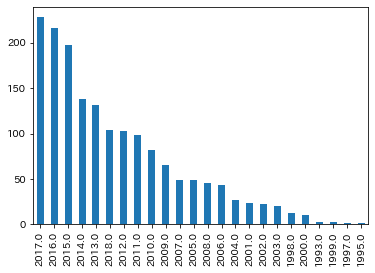

In [181]:
test_player["draft_year"].value_counts().plot.bar()

このままlabel encodingするとtestに未知なラベルができてしまう
→2020から引き算してプロ年数的な変数として扱うべき

In [185]:
train_player["pro_years"] = train_player["draft_year"].map(lambda x: int(2020 - int(x)) if x==x else x)
test_player["pro_years"] = test_player["draft_year"].map(lambda x: int(2020 - int(x)) if x==x else x)

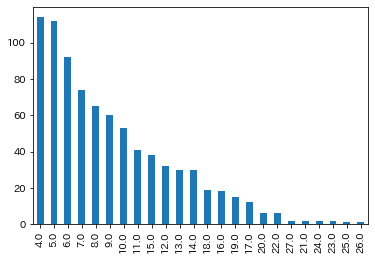

In [186]:
train_player["pro_years"].value_counts().plot.bar()

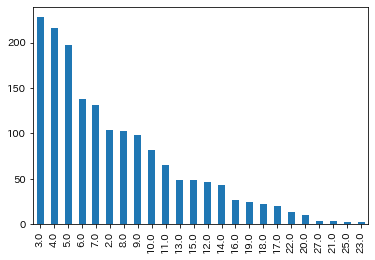

In [187]:
test_player["pro_years"].value_counts().plot.bar()

## draft_type

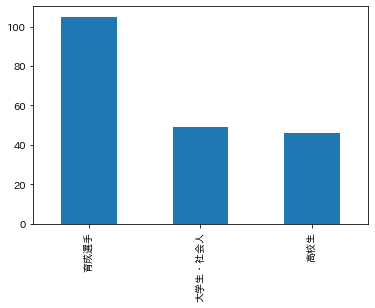

In [188]:
train_player["draft_type"].value_counts().plot.bar()

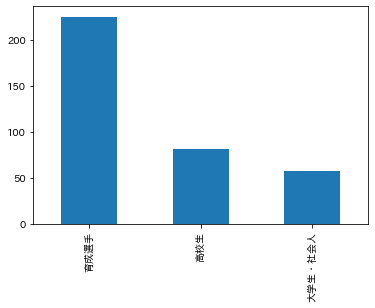

In [189]:
test_player["draft_type"].value_counts().plot.bar()

## draft_rank

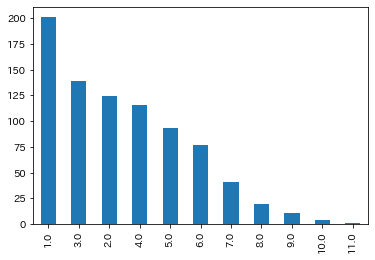

In [190]:
train_player["draft_rank"].value_counts().plot.bar()

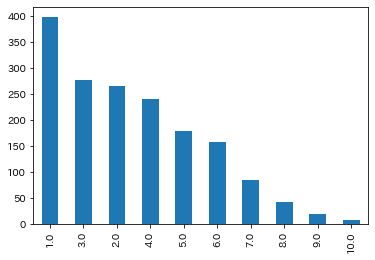

In [191]:
test_player["draft_rank"].value_counts().plot.bar()

## salary

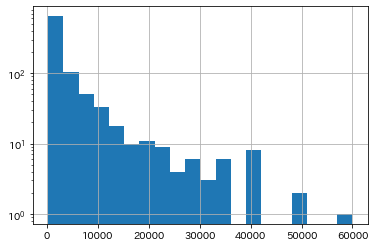

In [193]:
train_player["salary"].hist(bins=20, log=True)

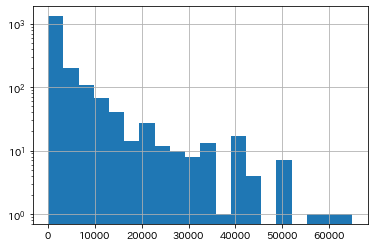

In [194]:
test_player["salary"].hist(bins=20, log=True)

## country

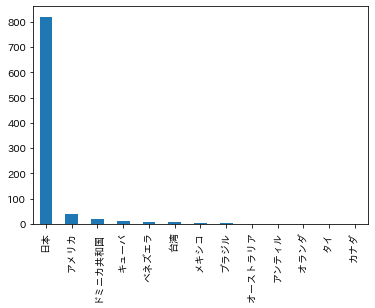

In [195]:
train_player["country"].value_counts().plot.bar()

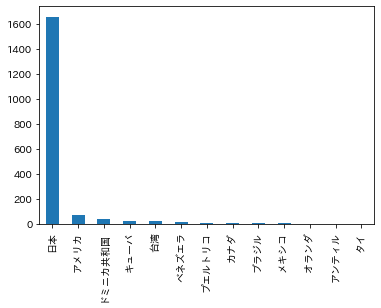

In [196]:
test_player["country"].value_counts().plot.bar()

この列は"日本", "外国"の2ラベルでまとめても良さそう

## birthplace

In [198]:
len(train_player["birthplace"].unique())

48

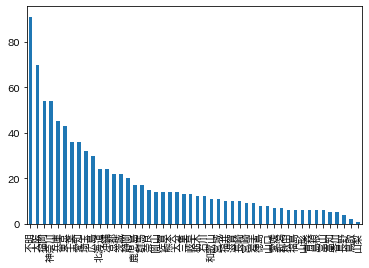

In [197]:
train_player["birthplace"].value_counts().plot.bar()

In [200]:
len(test_player["birthplace"].unique())

48

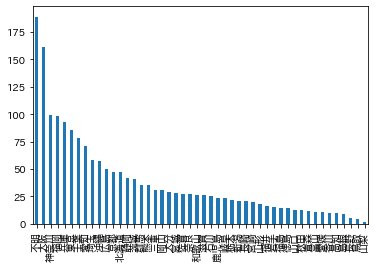

In [201]:
test_player["birthplace"].value_counts().plot.bar()

見た感じ日本人選手は生まれ県で、外国人は"不明"になってるぽい

## blood_type

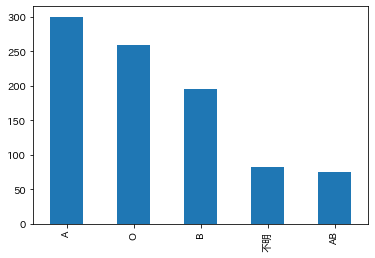

In [202]:
train_player["blood_type"].value_counts().plot.bar()

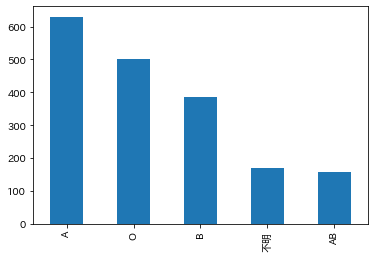

In [203]:
test_player["blood_type"].value_counts().plot.bar()